In [10]:
!pip install pandas 


     |████████████████████████████████| 9.5 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 1.3 MB/s eta 0:00:01


In [11]:
!pip install tensorflow


     |████████████████████████████████| 394.3 MB 580 kB/s eta 0:00:01
     |████████████████████████████████| 57 kB 899 kB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 485 kB/s eta 0:00:01
     |████████████████████████████████| 42 kB 722 kB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 519 kB/s eta 0:00:01
     |████████████████████████████████| 462 kB 490 kB/s eta 0:00:01
     |████████████████████████████████| 129 kB 881 kB/s eta 0:00:01
     |████████████████████████████████| 65 kB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 530 kB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 496 kB/s eta 0:00:01
     |████████████████████████████████| 298 kB 485 kB/s eta 0:00:01
     |████████████████████████████████| 781 kB 736 kB/s eta 0:00:01
     |████████████████████████████████| 4.9 MB 579 kB/s eta 0:00:01
     |████████████████████████████████| 146 kB 539 kB/s eta 0:00:01
     |████████████████████████████████| 97 kB 749

In [1]:
!nvidia-smi

Tue May 11 07:13:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 455.23.05    CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 4000     On   | 00000000:01:00.0 Off |                  N/A |
| 30%   37C    P8     3W / 125W |    271MiB /  7948MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Quadro RTX 4000     On   | 00000000:04:00.0 Off |                  N/A |
| 30%   

In [5]:
!pip install torchsummary

In [7]:
from efficientnet_pytorch_3d import EfficientNet3D
import torch

model = EfficientNet3D.from_name("efficientnet-b0", override_params={'num_classes': 2}, in_channels=1)

from torchsummary import summary


model = model.cuda()
inputs = torch.randn((1, 1, 200, 200, 200)).cuda()
labels = torch.tensor([0]).cuda()
summary(model, input_size=(1, 200, 200, 200))
# test forward
num_classes = 2

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

model.train()
for epoch in range(2):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    print('[%d] loss: %.3f' % (epoch + 1, loss.item()))

print('Finished Training')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         ZeroPad2d-1     [-1, 1, 201, 201, 201]               0
Conv3dStaticSamePadding-2    [-1, 32, 100, 100, 100]             864
       BatchNorm3d-3    [-1, 32, 100, 100, 100]              64
MemoryEfficientSwish-4    [-1, 32, 100, 100, 100]               0
         ZeroPad2d-5    [-1, 32, 101, 101, 101]               0
Conv3dStaticSamePadding-6       [-1, 32, 50, 50, 50]             864
       BatchNorm3d-7       [-1, 32, 50, 50, 50]              64
MemoryEfficientSwish-8       [-1, 32, 50, 50, 50]               0
          Identity-9          [-1, 32, 1, 1, 1]               0
Conv3dStaticSamePadding-10           [-1, 8, 1, 1, 1]             264
MemoryEfficientSwish-11           [-1, 8, 1, 1, 1]               0
         Identity-12           [-1, 8, 1, 1, 1]               0
Conv3dStaticSamePadding-13          [-1, 32, 1, 1, 1]             288
         I

[1] loss: 0.536
[2] loss: 0.595
Finished Training


In [9]:
!pip install --upgrade efficientnet-pytorch

In [11]:
!pip install graphviz python-graphviz

ERROR: Could not find a version that satisfies the requirement python-graphviz
ERROR: No matching distribution found for python-graphviz


In [12]:
!pip install hiddenlayer

In [14]:
!pip install matplotlib


     |████████████████████████████████| 11.5 MB 640 kB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 507 kB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 623 kB/s eta 0:00:01


In [17]:
import hiddenlayer as hl
hl.build_graph(model, torch.zeros([1, 1, 96, 96, 64]))

RuntimeError: Could not run 'aten::slow_conv3d_forward' with arguments from the 'CUDA' backend. This could be because the operator doesn't exist for this backend, or was omitted during the selective/custom build process (if using custom build). If you are a Facebook employee using PyTorch on mobile, please visit https://fburl.com/ptmfixes for possible resolutions. 'aten::slow_conv3d_forward' is only available for these backends: [CPU, BackendSelect, Named, AutogradOther, AutogradCPU, AutogradCUDA, AutogradXLA, AutogradNestedTensor, UNKNOWN_TENSOR_TYPE_ID, AutogradPrivateUse1, AutogradPrivateUse2, AutogradPrivateUse3, Tracer, Autocast, Batched, VmapMode].

CPU: registered at /pytorch/build/aten/src/ATen/RegisterCPU.cpp:5925 [kernel]
BackendSelect: fallthrough registered at /pytorch/aten/src/ATen/core/BackendSelectFallbackKernel.cpp:3 [backend fallback]
Named: registered at /pytorch/aten/src/ATen/core/NamedRegistrations.cpp:7 [backend fallback]
AutogradOther: registered at /pytorch/torch/csrc/autograd/generated/VariableType_4.cpp:8707 [autograd kernel]
AutogradCPU: registered at /pytorch/torch/csrc/autograd/generated/VariableType_4.cpp:8707 [autograd kernel]
AutogradCUDA: registered at /pytorch/torch/csrc/autograd/generated/VariableType_4.cpp:8707 [autograd kernel]
AutogradXLA: registered at /pytorch/torch/csrc/autograd/generated/VariableType_4.cpp:8707 [autograd kernel]
AutogradNestedTensor: registered at /pytorch/torch/csrc/autograd/generated/VariableType_4.cpp:8707 [autograd kernel]
UNKNOWN_TENSOR_TYPE_ID: registered at /pytorch/torch/csrc/autograd/generated/VariableType_4.cpp:8707 [autograd kernel]
AutogradPrivateUse1: registered at /pytorch/torch/csrc/autograd/generated/VariableType_4.cpp:8707 [autograd kernel]
AutogradPrivateUse2: registered at /pytorch/torch/csrc/autograd/generated/VariableType_4.cpp:8707 [autograd kernel]
AutogradPrivateUse3: registered at /pytorch/torch/csrc/autograd/generated/VariableType_4.cpp:8707 [autograd kernel]
Tracer: registered at /pytorch/torch/csrc/autograd/generated/TraceType_4.cpp:10612 [kernel]
Autocast: fallthrough registered at /pytorch/aten/src/ATen/autocast_mode.cpp:250 [backend fallback]
Batched: registered at /pytorch/aten/src/ATen/BatchingRegistrations.cpp:1016 [backend fallback]
VmapMode: fallthrough registered at /pytorch/aten/src/ATen/VmapModeRegistrations.cpp:33 [backend fallback]


In [19]:
!pip install efficientnet-3D

     |████████████████████████████████| 640 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 974 kB/s eta 0:00:01


In [21]:
!pip install keras_applications

     |████████████████████████████████| 50 kB 1.3 MB/s eta 0:00:011


In [24]:
!pip install scikit-image

     |████████████████████████████████| 12.4 MB 693 kB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 679 kB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 569 kB/s eta 0:00:01
     |████████████████████████████████| 148 kB 514 kB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 618 kB/s eta 0:00:01
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.7
    Uninstalling decorator-5.0.7:
      Successfully uninstalled decorator-5.0.7


In [27]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8 MB 90 kB/s  eta 0:00:01     |███████████████████████▌        | 309.6 MB 736 kB/s eta 0:02:33
     |████████████████████████████████| 448 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 529 kB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 2.0 MB/s eta 0:00:01
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7538 sha256=279855e7b15973f71458e282e8076c1c57d2df0eb508fd4ca84668b648f1222b
  Stored in directory: /home/vqtran/.cache/pip/wheels/19/a7/b9/0740c7a3a7d1d348f04823339274b90de25fbcd217b2ee1fbe
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard

In [31]:
import tensorflow as tf
import keras

In [34]:
%env SM_FRAMEWORK=tf.keras

env: SM_FRAMEWORK=tf.keras


In [42]:
!pip install q tensorflow==2.1
!pip install q keras==2.3.1

     |████████████████████████████████| 377 kB 2.2 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [51]:
import numpy as np
from matplotlib import pyplot as plt
#from tqdm import tqdm
import keras
from keras import backend as K
from keras import activations, initializers, regularizers, constraints, metrics
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import (Dense, Dropout, Activation, Flatten, Reshape, Layer,
                          BatchNormalization, LocallyConnected2D,
                          ZeroPadding2D, Conv2D, MaxPooling2D, Conv2DTranspose,
                          GaussianNoise, UpSampling2D, Input)
from keras.utils import conv_utils #multi_gpu_model
from keras.layers import Lambda
from keras.engine import Layer, InputSpec
from keras.legacy import interfaces

ImportError: cannot import name 'multi_gpu_model'

In [49]:
# models can be build with Keras or Tensorflow frameworks
# use keras and tfkeras modules respectively
# efficientnet.keras / efficientnet.tfkeras

#import efficientnet_3D.keras as efn 
import efficientnet_3D.tfkeras as efn
#keras.utils.generic_utils = keras.utils
model = efn.EfficientNetB0(input_shape=(64, 64, 64, 3), weights='imagenet')

ModuleNotFoundError: No module named 'tensorflow.python.keras.engine.base_layer_v1'

In [46]:
!pip uninstall tf-nightly

In [38]:
!python -c "import tensorflow"

2021-05-11 07:44:44.728904: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2021-05-11 07:44:44.744149: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6


In [47]:
!pip install efficientnet-3D

In [1]:

import ants 

In [2]:
pwd

'/home/vqtran'

In [3]:
cd /mnt

/mnt


In [4]:
ls


data_lab513/


In [5]:
cd data_lab513

/mnt/data_lab513


In [6]:
ls

 antran/        hthinh/            nxdung/                       tramy/
 data_hkimvy/  'install ubuntu'/  '$RECYCLE.BIN'/                vqtran_data/
 dataqthinh/    khiet/             system/                       xhien/
 dhlananh/      khoi/             'System Volume Information'/
 dhuy/          lab513/            tduy/


In [7]:
cd vqtran_data

/mnt/data_lab513/vqtran_data


In [8]:
ls

ADNI_data_preprocessed/                     Pre-Thesis_5/
ADNI_data_preprocessed_registrated.mat*     Pre-Thesis_5.zip*
ADNI_data_preprocessed_registrated.nii.gz*  Pre-Thesis_6/
Pre-Thesis_1/                               Pre-Thesis_6.zip*
Pre-Thesis_10/                              Pre-Thesis_7/
Pre-Thesis_10.zip*                          Pre-Thesis_7.zip*
Pre-Thesis_1.zip*                           Pre-Thesis_8/
Pre-Thesis_2/                               Pre-Thesis_8.zip*
Pre-Thesis_2.zip*                           Pre-Thesis_9/
Pre-Thesis_3/                               Pre-Thesis_9.zip*
Pre-Thesis_3.zip*                           PreThesis.csv*
Pre-Thesis_4/                               Pre-Thesis_metadata/
Pre-Thesis_4.zip*                           Pre-Thesis_metadata.zip*


In [ ]:
import shutil
import os

os.remove() removes a file.

os.rmdir() removes an empty directory.

shutil.rmtree() deletes a directory and all its contents.

In [11]:
#shutil.rmtree('/folder_name')
os.chdir('Pre-Thesis_1/')

In [12]:
ls

ADNI/


In [13]:
os.chdir('ADNI')

In [14]:
ls

002_S_0685/  012_S_4849/  031_S_4042/  052_S_1250/  098_S_0149/  131_S_0319/
002_S_0816/  013_S_1276/  031_S_4149/  053_S_4557/  098_S_2079/  131_S_0441/
002_S_0938/  013_S_4268/  031_S_4218/  057_S_0818/  099_S_4022/  131_S_0457/
002_S_4213/  013_S_4579/  031_S_4474/  057_S_4110/  099_S_4076/  135_S_4406/
002_S_4237/  013_S_5071/  031_S_4496/  067_S_4310/  099_S_4086/  136_S_0086/
002_S_4270/  014_S_4068/  032_S_1169/  067_S_4728/  099_S_4104/  136_S_0186/
002_S_4799/  018_S_4313/  032_S_4429/  067_S_4767/  099_S_4157/  136_S_0426/
003_S_0981/  018_S_4349/  032_S_4755/  067_S_5205/  099_S_4475/  136_S_4932/
005_S_0223/  018_S_4400/  033_S_0741/  068_S_2316/  099_S_4480/  137_S_0366/
006_S_4150/  019_S_4293/  033_S_0888/  068_S_4340/  100_S_4556/  137_S_0438/
006_S_4546/  019_S_4367/  033_S_1283/  068_S_4424/  100_S_4884/  137_S_0972/
006_S_4713/  019_S_4477/  035_S_4082/  070_S_4793/  109_S_0840/  137_S_4331/
006_S_4867/  019_S_4680/  035_S_4256/  070_S_4856/  114_S_0228/  137_S_4466/

In [15]:
pwd

'/mnt/data_lab513/vqtran_data/Pre-Thesis_1/ADNI'

In [16]:
ls

002_S_0685/  012_S_4849/  031_S_4042/  052_S_1250/  098_S_0149/  131_S_0319/
002_S_0816/  013_S_1276/  031_S_4149/  053_S_4557/  098_S_2079/  131_S_0441/
002_S_0938/  013_S_4268/  031_S_4218/  057_S_0818/  099_S_4022/  131_S_0457/
002_S_4213/  013_S_4579/  031_S_4474/  057_S_4110/  099_S_4076/  135_S_4406/
002_S_4237/  013_S_5071/  031_S_4496/  067_S_4310/  099_S_4086/  136_S_0086/
002_S_4270/  014_S_4068/  032_S_1169/  067_S_4728/  099_S_4104/  136_S_0186/
002_S_4799/  018_S_4313/  032_S_4429/  067_S_4767/  099_S_4157/  136_S_0426/
003_S_0981/  018_S_4349/  032_S_4755/  067_S_5205/  099_S_4475/  136_S_4932/
005_S_0223/  018_S_4400/  033_S_0741/  068_S_2316/  099_S_4480/  137_S_0366/
006_S_4150/  019_S_4293/  033_S_0888/  068_S_4340/  100_S_4556/  137_S_0438/
006_S_4546/  019_S_4367/  033_S_1283/  068_S_4424/  100_S_4884/  137_S_0972/
006_S_4713/  019_S_4477/  035_S_4082/  070_S_4793/  109_S_0840/  137_S_4331/
006_S_4867/  019_S_4680/  035_S_4256/  070_S_4856/  114_S_0228/  137_S_4466/

In [17]:
os.chdir('/mnt/data_lab513/vqtran_data/Pre-Thesis_2/ADNI')

In [18]:
ls

002_S_0413/  012_S_4545/  031_S_2022/  041_S_5026/  082_S_4224/  128_S_4742/
002_S_1018/  012_S_4849/  031_S_4021/  051_S_1296/  098_S_0896/  128_S_4792/
002_S_4219/  013_S_0592/  031_S_4032/  051_S_4929/  099_S_0352/  130_S_4352/
002_S_4229/  013_S_4579/  031_S_4476/  052_S_1250/  099_S_4076/  130_S_4417/
002_S_4251/  013_S_4580/  031_S_4721/  053_S_1044/  099_S_4104/  130_S_4730/
002_S_4270/  014_S_0356/  031_S_4947/  053_S_5070/  099_S_4202/  130_S_4817/
002_S_4473/  014_S_4058/  032_S_1101/  057_S_1379/  099_S_4463/  130_S_4925/
002_S_4521/  014_S_4263/  032_S_1169/  067_S_0059/  099_S_4475/  130_S_4990/
002_S_4654/  014_S_4328/  032_S_2240/  067_S_5205/  099_S_4498/  131_S_1301/
002_S_5018/  014_S_4615/  032_S_4277/  068_S_2315/  100_S_4511/  133_S_0525/
003_S_0981/  016_S_0538/  032_S_4755/  068_S_4061/  114_S_5047/  135_S_4281/
006_S_0484/  018_S_0369/  032_S_4823/  068_S_4134/  116_S_0370/  135_S_4446/
006_S_0498/  018_S_0425/  035_S_0156/  068_S_4968/  116_S_0392/  135_S_4598/

In [22]:
here = os.listdir(os.getcwd())

In [23]:
type(here)

list

In [24]:
here

['002_S_0413',
 '002_S_1018',
 '002_S_4219',
 '002_S_4229',
 '002_S_4251',
 '002_S_4270',
 '002_S_4473',
 '002_S_4521',
 '002_S_4654',
 '002_S_5018',
 '003_S_0981',
 '006_S_0484',
 '006_S_0498',
 '006_S_0547',
 '006_S_0653',
 '006_S_4363',
 '006_S_4679',
 '007_S_1339',
 '009_S_2208',
 '009_S_2381',
 '037_S_4028',
 '037_S_4146',
 '037_S_4214',
 '037_S_4308',
 '037_S_4410',
 '037_S_4432',
 '037_S_4706',
 '037_S_4770',
 '041_S_0125',
 '041_S_1002',
 '041_S_4874',
 '041_S_5026',
 '051_S_1296',
 '051_S_4929',
 '052_S_1250',
 '053_S_1044',
 '053_S_5070',
 '057_S_1379',
 '067_S_0059',
 '067_S_5205',
 '068_S_2315',
 '068_S_4061',
 '068_S_4134',
 '068_S_4968',
 '070_S_4692',
 '070_S_4793',
 '070_S_5040',
 '072_S_2037',
 '072_S_2072',
 '116_S_0392',
 '116_S_0487',
 '116_S_4043',
 '116_S_4167',
 '116_S_4338',
 '116_S_4635',
 '116_S_4898',
 '123_S_4127',
 '123_S_4170',
 '127_S_0431',
 '127_S_0684',
 '127_S_0844',
 '128_S_0167',
 '128_S_0229',
 '128_S_0245',
 '128_S_0740',
 '128_S_0863',
 '128_S_45

In [25]:
ADNI_10_dir_list = ['/mnt/data_lab513/vqtran_data/Pre-Thesis_1/ADNI',
                    '/mnt/data_lab513/vqtran_data/Pre-Thesis_2/ADNI',
                    '/mnt/data_lab513/vqtran_data/Pre-Thesis_3/ADNI',
                    '/mnt/data_lab513/vqtran_data/Pre-Thesis_4/ADNI',
                    '/mnt/data_lab513/vqtran_data/Pre-Thesis_5/ADNI',
                    '/mnt/data_lab513/vqtran_data/Pre-Thesis_6/ADNI',
                    '/mnt/data_lab513/vqtran_data/Pre-Thesis_7/ADNI',
                    '/mnt/data_lab513/vqtran_data/Pre-Thesis_8/ADNI',
                    '/mnt/data_lab513/vqtran_data/Pre-Thesis_9/ADNI',
                    '/mnt/data_lab513/vqtran_data/Pre-Thesis_10/ADNI'
                   ] 

In [26]:
Subject_dir_list = []
for item in ADNI_10_dir_list:
    Subject_dir_list.append(os.listdir(item))

10

In [32]:
check_sum_subject = 0
for i in range(len(Subject_dir_list)):
    check_sum_subject += len(Subject_dir_list[i])

In [33]:
check_sum_subject

1952

In [34]:
2004 - 1952

52

In [35]:
unique_subject_dir_1 = set(Subject_dir_list[1])

In [36]:
unique_subject_dir_2 = set(Subject_dir_list[2])

In [50]:
len(unique_subject_dir_1.intersection(unique_subject_dir_2 ))

25

In [38]:
ls

002_S_0413/  012_S_4545/  031_S_2022/  041_S_5026/  082_S_4224/  128_S_4742/
002_S_1018/  012_S_4849/  031_S_4021/  051_S_1296/  098_S_0896/  128_S_4792/
002_S_4219/  013_S_0592/  031_S_4032/  051_S_4929/  099_S_0352/  130_S_4352/
002_S_4229/  013_S_4579/  031_S_4476/  052_S_1250/  099_S_4076/  130_S_4417/
002_S_4251/  013_S_4580/  031_S_4721/  053_S_1044/  099_S_4104/  130_S_4730/
002_S_4270/  014_S_0356/  031_S_4947/  053_S_5070/  099_S_4202/  130_S_4817/
002_S_4473/  014_S_4058/  032_S_1101/  057_S_1379/  099_S_4463/  130_S_4925/
002_S_4521/  014_S_4263/  032_S_1169/  067_S_0059/  099_S_4475/  130_S_4990/
002_S_4654/  014_S_4328/  032_S_2240/  067_S_5205/  099_S_4498/  131_S_1301/
002_S_5018/  014_S_4615/  032_S_4277/  068_S_2315/  100_S_4511/  133_S_0525/
003_S_0981/  016_S_0538/  032_S_4755/  068_S_4061/  114_S_5047/  135_S_4281/
006_S_0484/  018_S_0369/  032_S_4823/  068_S_4134/  116_S_0370/  135_S_4446/
006_S_0498/  018_S_0425/  035_S_0156/  068_S_4968/  116_S_0392/  135_S_4598/

In [39]:
pwd

'/mnt/data_lab513/vqtran_data/Pre-Thesis_2/ADNI'

In [40]:
cd '/mnt/data_lab513/vqtran_data/Pre-Thesis_1/ADNI'

/mnt/data_lab513/vqtran_data/Pre-Thesis_1/ADNI


In [41]:
ls

002_S_0685/  012_S_4849/  031_S_4042/  052_S_1250/  098_S_0149/  131_S_0319/
002_S_0816/  013_S_1276/  031_S_4149/  053_S_4557/  098_S_2079/  131_S_0441/
002_S_0938/  013_S_4268/  031_S_4218/  057_S_0818/  099_S_4022/  131_S_0457/
002_S_4213/  013_S_4579/  031_S_4474/  057_S_4110/  099_S_4076/  135_S_4406/
002_S_4237/  013_S_5071/  031_S_4496/  067_S_4310/  099_S_4086/  136_S_0086/
002_S_4270/  014_S_4068/  032_S_1169/  067_S_4728/  099_S_4104/  136_S_0186/
002_S_4799/  018_S_4313/  032_S_4429/  067_S_4767/  099_S_4157/  136_S_0426/
003_S_0981/  018_S_4349/  032_S_4755/  067_S_5205/  099_S_4475/  136_S_4932/
005_S_0223/  018_S_4400/  033_S_0741/  068_S_2316/  099_S_4480/  137_S_0366/
006_S_4150/  019_S_4293/  033_S_0888/  068_S_4340/  100_S_4556/  137_S_0438/
006_S_4546/  019_S_4367/  033_S_1283/  068_S_4424/  100_S_4884/  137_S_0972/
006_S_4713/  019_S_4477/  035_S_4082/  070_S_4793/  109_S_0840/  137_S_4331/
006_S_4867/  019_S_4680/  035_S_4256/  070_S_4856/  114_S_0228/  137_S_4466/

In [42]:
cd 002_S_0685/

/mnt/data_lab513/vqtran_data/Pre-Thesis_1/ADNI/002_S_0685


In [43]:
ls

MP-RAGE/


In [44]:
cd MP-RAGE/

/mnt/data_lab513/vqtran_data/Pre-Thesis_1/ADNI/002_S_0685/MP-RAGE


In [45]:
ls

2006-07-06_10_36_49.0/


In [46]:
cd 2006-07-06_10_36_49.0/

/mnt/data_lab513/vqtran_data/Pre-Thesis_1/ADNI/002_S_0685/MP-RAGE/2006-07-06_10_36_49.0


In [47]:
ls

S16309/


In [48]:
cd S16309/

/mnt/data_lab513/vqtran_data/Pre-Thesis_1/ADNI/002_S_0685/MP-RAGE/2006-07-06_10_36_49.0/S16309


In [49]:
ls

ADNI_002_S_0685_MR_MP-RAGE__br_raw_20060707100704129_1_S16309_I18211.nii*


In [53]:
import nibabel as nib
img = nib.load('/mnt/data_lab513/vqtran_data/Pre-Thesis_1/ADNI/002_S_0685/MP-RAGE/2006-07-06_10_36_49.0/S16309/ADNI_002_S_0685_MR_MP-RAGE__br_raw_20060707100704129_1_S16309_I18211.nii')

In [54]:
img.shape

(166, 256, 256, 1)

In [56]:
import numpy as np
img.get_data_dtype() == np.dtype(np.int16)

False

In [57]:
img.get_data_dtype()

dtype('>i2')

In [58]:
img.affine.shape

(4, 4)

In [59]:
data = img.get_fdata()

In [60]:
data.shape


(166, 256, 256, 1)

In [61]:
type(data)

numpy.memmap

In [62]:
hdr = img.header

In [63]:
hdr.get_xyzt_units()

('mm', 'unknown')

In [65]:
raw = hdr.structarr
raw['xyzt_units']

array(2, dtype=uint8)

#Create image

import numpy as np
data = np.ones((32, 32, 15, 100), dtype=np.int16)
img = nib.Nifti1Image(data, np.eye(4))
img.get_data_dtype() == np.dtype(np.int16)
True
img.header.get_xyzt_units()
('unknown', 'unknown')

In [66]:
# save image
#nib.save(img, os.path.join('build', 'test4d.nii.gz'))  

In [71]:
!pip install scikit-image

In [93]:
data.shape

(166, 256, 256, 1)

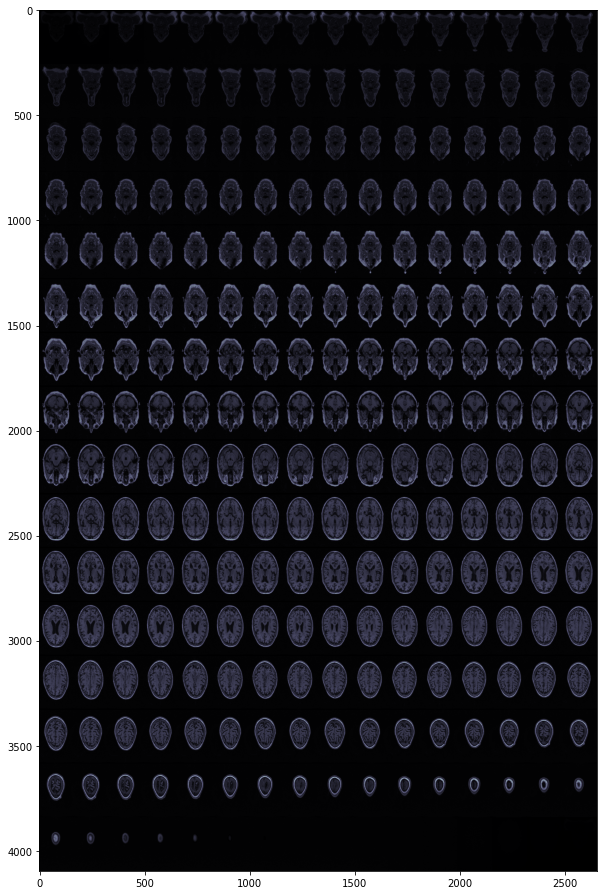

In [92]:
import skimage
import matplotlib.pyplot as plt
#from skimage.util.montage2d import montage2d
from skimage.util import montage as montage2d
fig, ax1 = plt.subplots(1, 1, figsize = (10, 20))
ax1.imshow(montage2d(np.squeeze(data,3).T), cmap ='bone')
#fig.savefig('ct_scan.png')

Text(0.5, 1.0, 'Image')

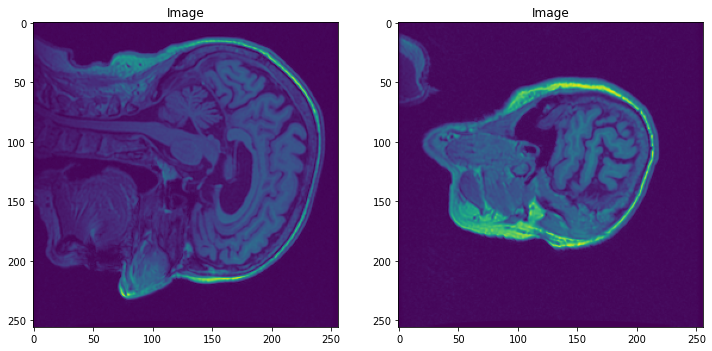

In [101]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
ax1.imshow(data[data.shape[0]//2])
ax1.set_title('Image')
ax2.imshow(data[data.shape[1]//2])
ax2.set_title('Image')

In [1]:
import os
import shutil

In [2]:
os.getcwd()

'/home/vqtran'

In [7]:
base_dir = '/mnt/data_lab513/vqtran_data'
sample_dir = '/mnt/data_lab513/vqtran_data/Pre-Thesis_9/ADNI/018_S_0633/MPRAGE/2006-07-17_11_17_11.0/S16899/ADNI_018_S_0633_MR____________MPRAGE__br_raw_20060718141555940_86_S16899_I19092.nii'
os.chdir(base_dir)

In [11]:
import ants

In [12]:
ants.image_read(sample_dir)

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (170, 256, 256)
	 Spacing    : (1.2, 1.0, 1.0)
	 Origin     : (-107.5505, -154.6003, 440.8292)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

In [13]:
help(ants)

Help on package ants:

NAME
    ants

PACKAGE CONTENTS
    admin
    apps
    clawer
    conf (package)
    contrib (package)
    core (package)
    decorators
    learn (package)
    lib (package)
    management (package)
    migrations (package)
    parser
    registration (package)
    segmentation (package)
    tests
    utils (package)
    version
    viz (package)

SUBMODULES
    ants_image
    ants_image_io
    ants_integrate_velocity_field
    ants_metric
    ants_metric_io
    ants_transform
    ants_transform_io
    bias_correction
    channels
    convert_nibabel
    decomposition
    get_neighborhood
    interface
    kmeans
    landmark_transforms
    metrics
    otsu
    process_args
    scalar_rgb_vector
    surface
    volume

VERSION
    0.2.7

FILE
    /home/vqtran/miniconda3/envs/test/lib/python3.6/site-packages/ants/__init__.py




START HERE

In [29]:
filename_list[:5]

['ADNI_002_S_0685_MR_MP-RAGE__br_raw_20060707100704129_1_S16309_I18211.nii',
 'ADNI_002_S_0816_MR_MPRAGE_br_raw_20060929164645213_1_S19532_I25405.nii',
 'ADNI_002_S_0938_MR_MP-RAGE__br_raw_20061006161734960_1_S19852_I25952.nii',
 'ADNI_002_S_4213_MR_MPRAGE_br_raw_20120319115441044_137_S144143_I290931.nii',
 'ADNI_002_S_4237_MR_MPRAGE_br_raw_20120522102000271_49_S149132_I301770.nii']

In [2]:
import os, subprocess, re, traceback, sys
from glob import glob
import ants
import nibabel as nib
from nilearn import plotting
from nipype.interfaces import fsl
import matplotlib.pyplot as plt
%matplotlib inline


# global settings
base_path = '/mnt/data_lab513/vqtran_data'
root_data = os.path.join(base_path, "data", "raw_data", "ADNI_NIfTI")
root_bias_correction = os.path.join(base_path, "data", "clean_data", "mri_bias_correction")
root_bet = os.path.join(base_path, "data", "clean_data", "mri_brain_extraction")
root_reg = os.path.join(base_path, "data", "clean_data", "mri_registration")

#fsl_dir = os.path.join(base_path, "tools", "fsl")
#fsl_dir = '/home/vqtran/fsl'
#current_path = os.environ['PATH']
#os.environ['PATH'] = "{}:{}/bin:{}".format(current_path, fsl_dir, '/bin/')
#os.environ['FSLDIR'] = fsl_dir
#os.environ['FSLOUTPUTTYPE'] = "NIFTI_GZ"


/home/vqtran/miniconda3/envs/test/lib/python3.6/site-packages/nilearn/datasets/__init__.py:90: FutureWarning:

Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.



In [9]:
#os.mkdir(os.path.join(base_path, "data"))
#os.mkdir(os.path.join(base_path, "data","raw_data"))
#os.mkdir(root_data)
os.mkdir(os.path.join(base_path, "data","clean_data"))
os.mkdir(root_bias_correction)
os.mkdir(root_bet)
os.mkdir(root_reg)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import shutil
import os
base_dir = '/mnt/data_lab513/vqtran_data'
#copy_data_dir = os.path.join(base_dir, "data", "Pre-Thesis_1")
count = 0
filename_list = []
for dirname, _, filenames in os.walk(base_dir):
    for filename in filenames:
        #print(filename)
        #print(os.path.join(dirname, filename))
        if ".nii" in filename:
            count += 1
            filename_list.append(filename)
            shutil.copy(os.path.join(dirname, filename), root_data)
        
print(count)
print(len(filename_list))
filename_set = set(filename_list)
print(len(filename_set))

In [11]:
cd /mnt/data_lab513/vqtran_data


/mnt/data_lab513/vqtran_data


In [12]:
ls

data/           Pre-Thesis_3/  Pre-Thesis_7/   Pre-Thesis_metadata/
Pre-Thesis_1/   Pre-Thesis_4/  Pre-Thesis_8/
Pre-Thesis_10/  Pre-Thesis_5/  Pre-Thesis_9/
Pre-Thesis_2/   Pre-Thesis_6/  PreThesis.csv*


In [13]:
import shutil
shutil.move('/mnt/data_lab513/vqtran_data/Pre-Thesis_1', '/mnt/data_lab513/vqtran_data/data')

'/mnt/data_lab513/vqtran_data/data/Pre-Thesis_1'

In [15]:
shutil.move('/mnt/data_lab513/vqtran_data/Pre-Thesis_2', '/mnt/data_lab513/vqtran_data/data')
shutil.move('/mnt/data_lab513/vqtran_data/Pre-Thesis_3', '/mnt/data_lab513/vqtran_data/data')
shutil.move('/mnt/data_lab513/vqtran_data/Pre-Thesis_4', '/mnt/data_lab513/vqtran_data/data')
shutil.move('/mnt/data_lab513/vqtran_data/Pre-Thesis_5', '/mnt/data_lab513/vqtran_data/data')
shutil.move('/mnt/data_lab513/vqtran_data/Pre-Thesis_6', '/mnt/data_lab513/vqtran_data/data')
shutil.move('/mnt/data_lab513/vqtran_data/Pre-Thesis_7', '/mnt/data_lab513/vqtran_data/data')
shutil.move('/mnt/data_lab513/vqtran_data/Pre-Thesis_8', '/mnt/data_lab513/vqtran_data/data')
shutil.move('/mnt/data_lab513/vqtran_data/Pre-Thesis_9', '/mnt/data_lab513/vqtran_data/data')
shutil.move('/mnt/data_lab513/vqtran_data/Pre-Thesis_10', '/mnt/data_lab513/vqtran_data/data')

'/mnt/data_lab513/vqtran_data/data/Pre-Thesis_10'

In [16]:
ls

data/  PreThesis.csv*  Pre-Thesis_metadata/


In [17]:
os.mkdir(os.path.join(base_path, "data","meta_data"))

In [18]:
shutil.move('/mnt/data_lab513/vqtran_data/Pre-Thesis_metadata', '/mnt/data_lab513/vqtran_data/data/meta_data')

'/mnt/data_lab513/vqtran_data/data/meta_data/Pre-Thesis_metadata'

In [19]:
ls

data/  PreThesis.csv*


In [20]:
shutil.move('/mnt/data_lab513/vqtran_data/PreThesis.csv', '/mnt/data_lab513/vqtran_data/data/meta_data')

'/mnt/data_lab513/vqtran_data/data/meta_data/PreThesis.csv'

In [21]:
ls

data/


In [22]:
cd data

/mnt/data_lab513/vqtran_data/data


In [23]:
ls

clean_data/    Pre-Thesis_10/  Pre-Thesis_4/  Pre-Thesis_7/  raw_data/
meta_data/     Pre-Thesis_2/   Pre-Thesis_5/  Pre-Thesis_8/
Pre-Thesis_1/  Pre-Thesis_3/   Pre-Thesis_6/  Pre-Thesis_9/
